In [1]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


from modules import gbvoid_dataset as gbvoid
from modules import LDA_Model as LDA_model
from modules import LDA_model_command as LDA_model_command
from modules import cm_analysis as cm_analysis

In [2]:
# DATA

inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009']

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'Misorientation Angle','Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain',
         'Mis. X in Left Hand Grain','Mis. Y in Left Hand Grain','Mis. Z in Left Hand Grain',
         'Lenght','Trace', 'X start', 'Y start', 'X end','Y end','ID Right Grain', 'ID Left Grain', 'Void']

columns_drop=['ID Right Grain','ID Left Grain']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

# Drop ID grain form the dataset
void_dataset=void_dataset.drop(columns_drop, axis=1)

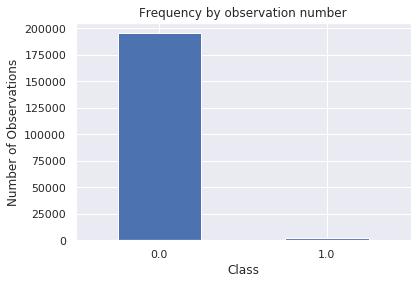

In [3]:
count_classes = pd.value_counts(void_dataset['Void'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

CONFUSION MATRIX:
[[19519     0]
 [  212     0]]
Accuracy: 0.9892554862906087


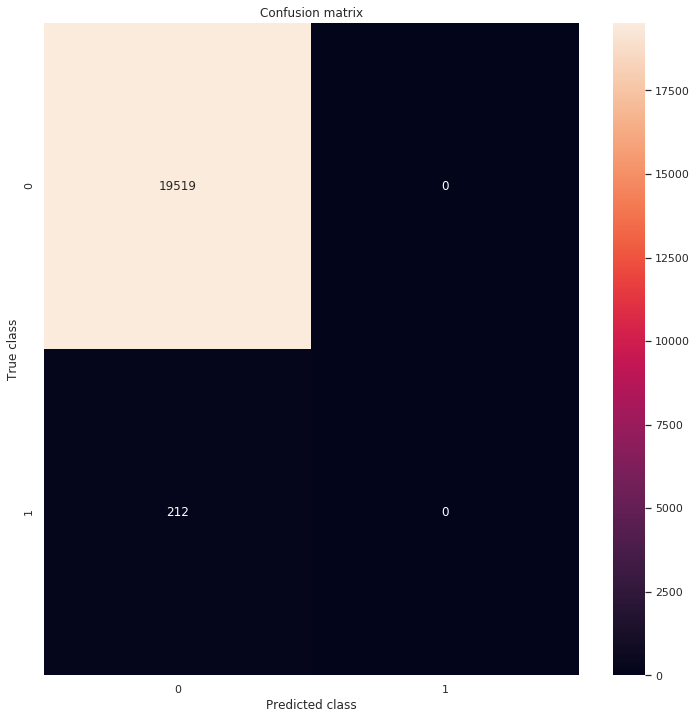

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19519
         1.0       0.00      0.00      0.00       212

    accuracy                           0.99     19731
   macro avg       0.49      0.50      0.50     19731
weighted avg       0.98      0.99      0.98     19731



Analytic Results:
Recall score class 1: 1.0
Recall score class 2: 0.0
Precision class 1: 0.9892554862906087
Precision class 2: nan
Accuracy: 0.9892554862906087


/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/estanislao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


In [4]:
cm=LDA_model_command.LDA_model_command(void_dataset)


precision_class1=cm[0][0]/(cm[0][0]+cm[1][0])
precision_class2=cm[1][1]/(cm[1][1]+cm[0][1])
recall_class1=cm[0][0]/(cm[0][0]+cm[0][1])
recall_class2=cm[1][1]/(cm[1][1]+cm[1][0])
Accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print('\n')
print('Analytic Results:')
print('Recall score class 1: '+ str(recall_class1))
print('Recall score class 2: '+ str(recall_class2))
print('Precision class 1: '+ str(precision_class1))
print('Precision class 2: '+ str(precision_class2))
print('Accuracy: '+ str(Accuracy))

CONFUSION MATRIX:
[[19549     0]
 [  182     0]]
Accuracy: 0.9907759363438244


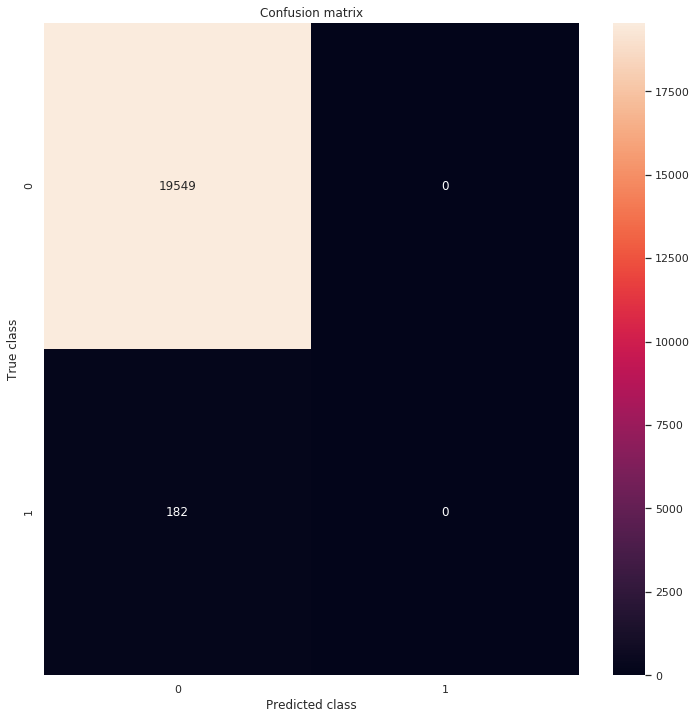

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     19549
         1.0       0.00      0.00      0.00       182

    accuracy                           0.99     19731
   macro avg       0.50      0.50      0.50     19731
weighted avg       0.98      0.99      0.99     19731



/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[19549,     0],
       [  182,     0]])

In [5]:
LDA_model_command.LDA_model_command(void_dataset)

CONFUSION MATRIX:
[[19544     0]
 [  187     0]]
Accuracy: 0.9905225280016218


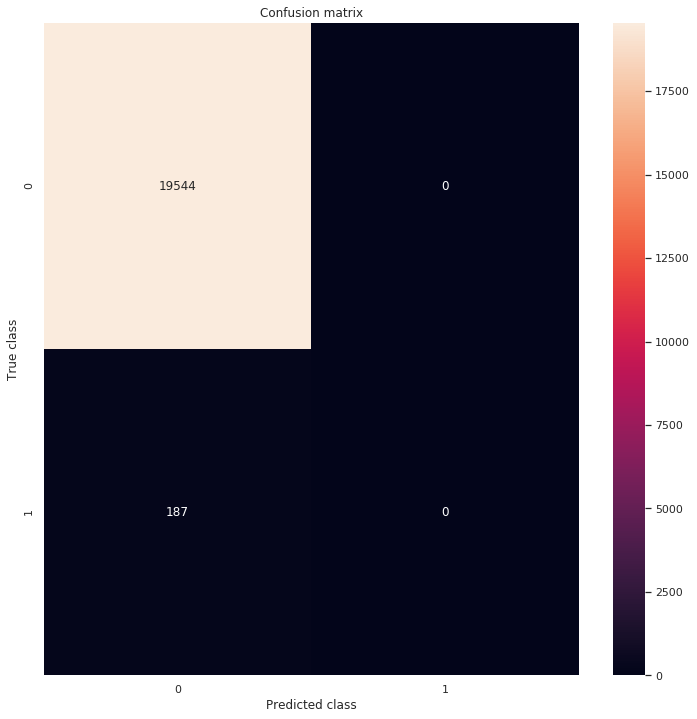

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     19544
         1.0       0.00      0.00      0.00       187

    accuracy                           0.99     19731
   macro avg       0.50      0.50      0.50     19731
weighted avg       0.98      0.99      0.99     19731



/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[19544,     0],
       [  187,     0]])

In [6]:
LDA_model_command.LDA_model_command(void_dataset)

CONFUSION MATRIX:
[[19496     0]
 [  235     0]]
Accuracy: 0.9880898079164766


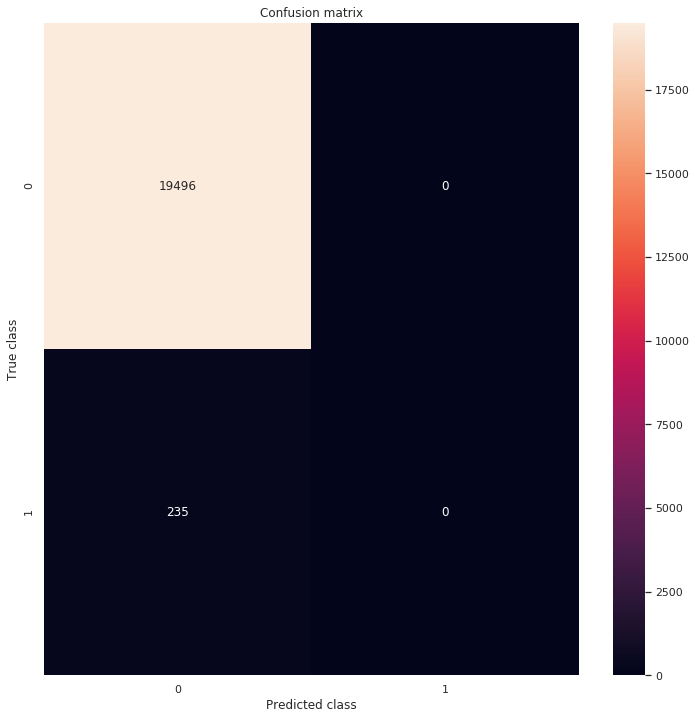

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19496
         1.0       0.00      0.00      0.00       235

    accuracy                           0.99     19731
   macro avg       0.49      0.50      0.50     19731
weighted avg       0.98      0.99      0.98     19731



/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[19496,     0],
       [  235,     0]])

In [7]:
LDA_model_command.LDA_model_command(void_dataset)

CONFUSION MATRIX:
[[19516     0]
 [  215     0]]
Accuracy: 0.9891034412852872


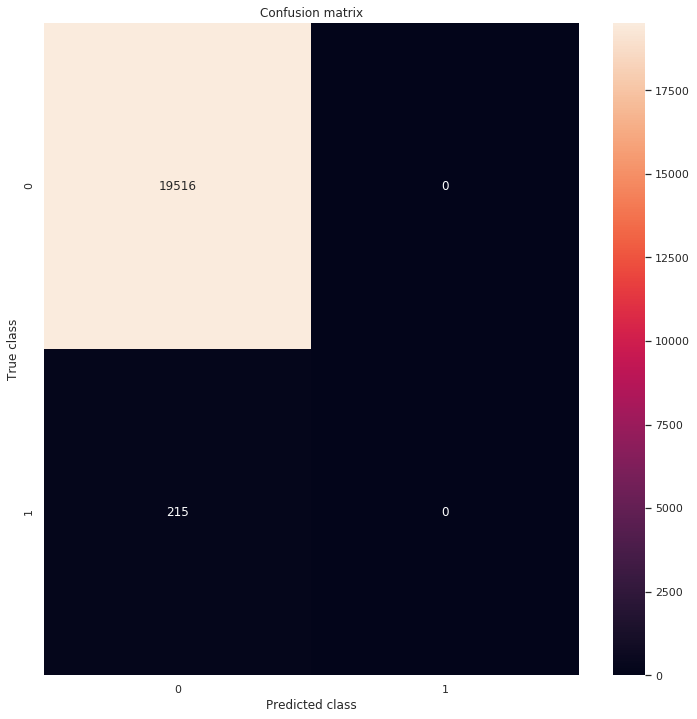

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19516
         1.0       0.00      0.00      0.00       215

    accuracy                           0.99     19731
   macro avg       0.49      0.50      0.50     19731
weighted avg       0.98      0.99      0.98     19731



/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[19516,     0],
       [  215,     0]])

In [8]:
LDA_model_command.LDA_model_command(void_dataset)

CONFUSION MATRIX:
[[19530     0]
 [  201     0]]
Accuracy: 0.9898129846434545


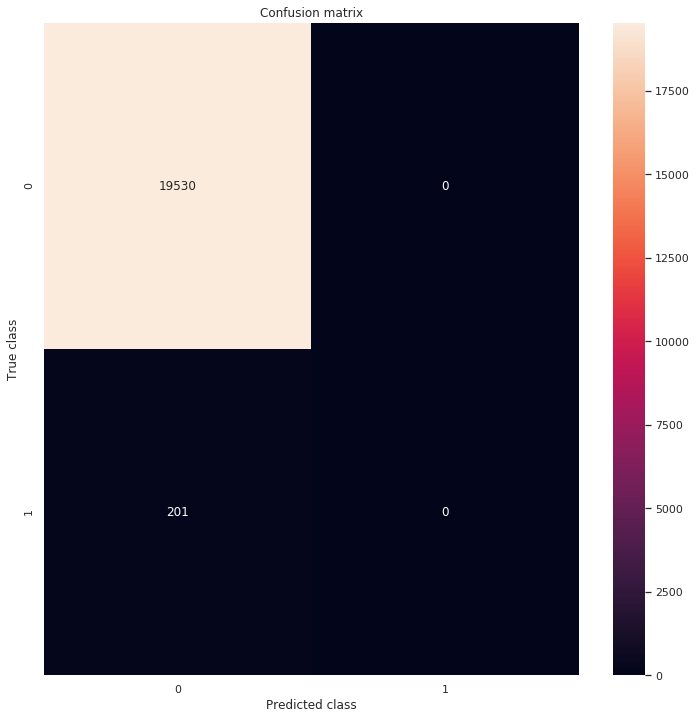

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19530
         1.0       0.00      0.00      0.00       201

    accuracy                           0.99     19731
   macro avg       0.49      0.50      0.50     19731
weighted avg       0.98      0.99      0.98     19731



/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[19530,     0],
       [  201,     0]])

In [9]:
LDA_model_command.LDA_model_command(void_dataset)

[0 0 0 ... 0 0 0]


ValueError: x and y must be the same size

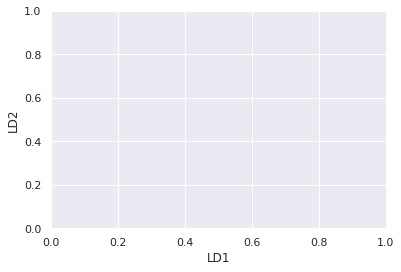

In [35]:
# Split data into X and y
X = void_dataset.drop('Void', axis=1)
y = void_dataset['Void']

# Training and Test set 90-10%. Always Random
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LDA transform
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Classifier Random Foreset Classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#print(X_train)
#print(y_train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_fit = le.fit_transform(void_dataset['Void'])
print(y_fit)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_train,X_test,c=y,cmap='rainbow',alpha=0.7,edgecolors='b')



IndexError: boolean index did not match indexed array along dimension 0; dimension is 177573 but corresponding boolean dimension is 197304

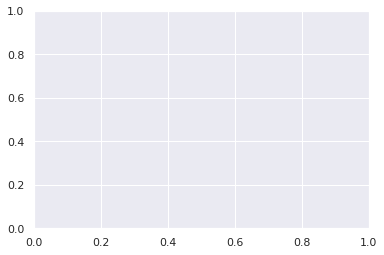

In [13]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_train[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/home/estanislao/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


explained variance ratio (first two components): [0.51540218 0.47447981]


IndexError: index 1 is out of bounds for axis 1 with size 1

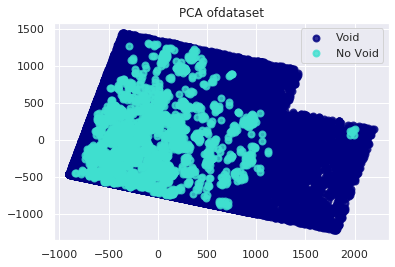

<Figure size 432x288 with 0 Axes>

In [19]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

target_names = ['Void', 'No Void']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA ofdataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of dataset')

plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[19515     0]
 [  216     0]]
Accuracy: 0.9890527596168466


In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.0

In [23]:
#recall score
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.0